# 📊 Exploratory Data Analysis (EDA): Supply Chain Logistics Dataset

This notebook performs **Exploratory Data Analysis (EDA)** on a real-world supply chain logistics dataset. EDA is the foundation of any data-driven investigation. It helps us understand the **structure**, **patterns**, and **quality** of the data before applying any models, algorithms, or drawing conclusions.

---

### 🎯 Objectives of This Notebook

- Load and preview the dataset
- Clean and prepare data (without modifying original files)
- Explore patterns through visualizations
- Understand distributions and correlations
- Surface operational, temporal, and spatial trends
- Explore how different features relate to delivery delay and risk classification

We strictly avoid modeling, statistical testing, or altering the source dataset at this stage.

---

### 📁 Dataset Source

This notebook uses a dataset located in the `0_datasets/` directory. Per project guidelines:

- Do not modify the original data
- Ensure all analysis is reproducible
- Save outputs and visuals to this exploration folder if needed

---

### 📚 Reference Guide

This analysis follows principles from:

- **Chapter 4 - Exploratory Data Analysis**  
  From *The Art of Data Science* by Roger D. Peng and Elizabeth Matsui

> "Exploratory analysis is not about testing a hypothesis. It's about allowing the data to reveal its structure, patterns, and surprises."

---

> **This is not modeling.**  
> No inferential statistics or machine learning is performed here.  
> This work is intended to prepare for those stages by grounding us in what the data is really saying.

---



## Step 1: Initial Glimpse and Summary
### ✅ Data Preview

- **Temporal**: timestamp
- **Geospatial**: vehicle_gps_latitude, vehicle_gps_longitude
- **Operational & Predictive**: fuel, delay, risk, congestion, equipment, etc.
- **Target/Label**: risk_classification, delivery_time_deviation
---
### 📊 Descriptive Summary

- Most variables are numerical and will be great for correlation and trend analysis.
- timestamp needs to be converted to a datetime format for time-based exploration.
- Two categorical variables:
  - timestamp (to be parsed)
  - risk_classification
---
### ⚠️ Data Quality

- **Missing values**: None (every column has 32,065 entries).
- **Duplicate rows**: `0` duplicates found – ✅ clean!


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset using raw string literal and fallback encoding
df = pd.read_csv(r"C:\Users\alema\OneDrive\Desktop\DS_GroupProject\dynamic_supply_chain_logistics_dataset.csv", encoding='latin1')

# Basic Structure
df.head()

,timestamp,vehicle_gps_latitude,vehicle_gps_longitude,fuel_consumption_rate,eta_variation_hours,traffic_congestion_level,warehouse_inventory_level,loading_unloading_time,handling_equipment_availability,order_fulfillment_status,...,iot_temperature,cargo_condition_status,route_risk_level,customs_clearance_time,driver_behavior_score,fatigue_monitoring_score,disruption_likelihood_score,delay_probability,risk_classification,delivery_time_deviation
0,1/1/2021 0:00,40.375568,-77.014318,5.136512,4.998009,5.927586,985.716862,4.951392,0.481294,0.761166,...,0.574400,0.777263,1.182116,0.502006,0.033843,0.978599,0.506152,0.885291,Moderate Risk,9.110682
1,1/1/2021 1:00,33.507818,-117.036902,5.101512,0.984929,1.591992,396.700206,1.030379,0.620780,0.196594,...,-9.753493,0.091839,9.611988,0.966774,0.201725,0.918586,0.980784,0.544178,High Risk,8.175281
2,1/1/2021 2:00,30.020640,-75.269224,5.090803,4.972665,8.787765,832.408935,4.220229,0.810933,0.152742,...,-6.491034,0.253529,6.570431,0.945627,0.264045,0.394215,0.998633,0.803322,High Risk,1.283594
3,1/1/2021 3:00,36.649223,-70.190529,8.219558,3.095064,0.045257,0.573283,0.530186,0.008525,0.811885,...,-0.151276,0.877576,0.548952,4.674035,0.362885,0.905444,0.993320,0.025977,High Risk,9.304897
4,1/1/2021 4:00,30.001279,-70.012195,5.000075,3.216077,8.004851,914.925067,3.620890,0.020083,0.053659,...,2.429448,0.262081,8.861443,3.445429,0.016957,0.258702,0.912433,0.991122,High Risk,7.752484


In [17]:

# Basic structure
df.shape

(32065, 26)

In [19]:
# Basic structure
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32065 entries, 0 to 32064
Data columns (total 26 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   timestamp                        32065 non-null  object 
 1   vehicle_gps_latitude             32065 non-null  float64
 2   vehicle_gps_longitude            32065 non-null  float64
 3   fuel_consumption_rate            32065 non-null  float64
 4   eta_variation_hours              32065 non-null  float64
 5   traffic_congestion_level         32065 non-null  float64
 6   warehouse_inventory_level        32065 non-null  float64
 7   loading_unloading_time           32065 non-null  float64
 8   handling_equipment_availability  32065 non-null  float64
 9   order_fulfillment_status         32065 non-null  float64
 10  weather_condition_severity       32065 non-null  float64
 11  port_congestion_level            32065 non-null  float64
 12  shipping_costs    

## Step 2: Data Cleaning & Type Adjustments

In [6]:
# Convert timestamp to datetime
df['timestamp'] = pd.to_datetime(df['timestamp'])


## Step 3: Univariate Analysis

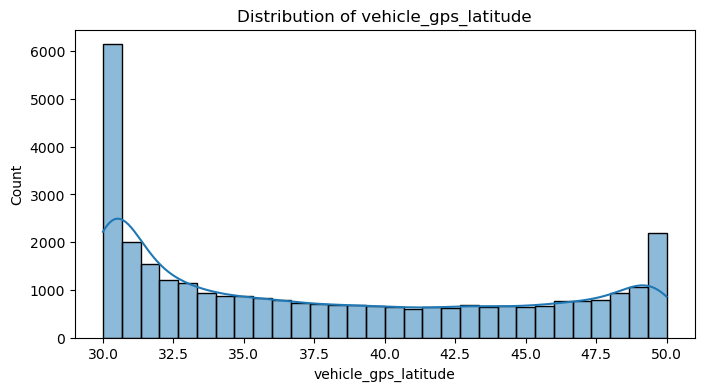

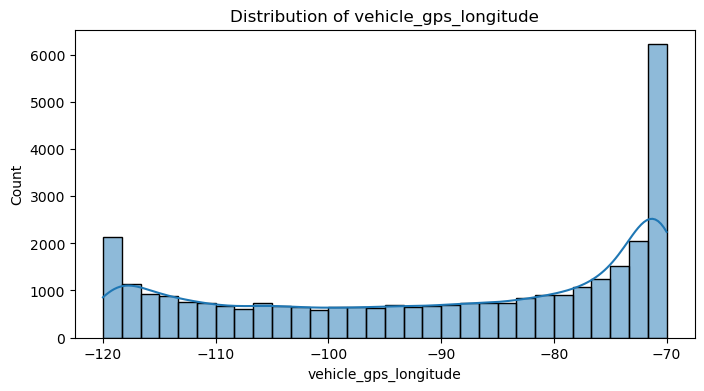

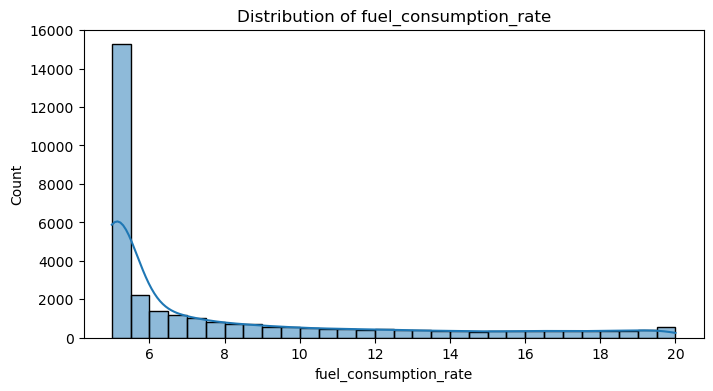

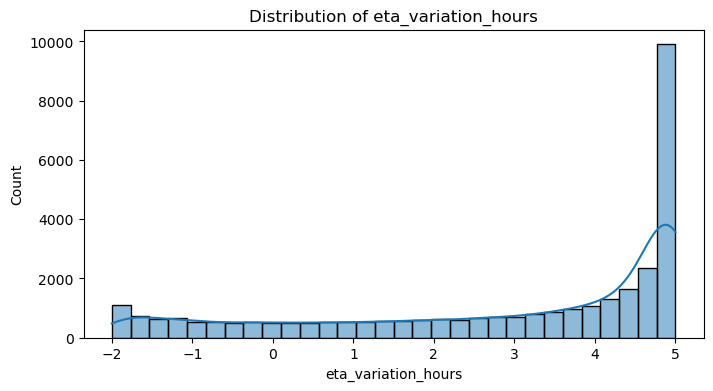

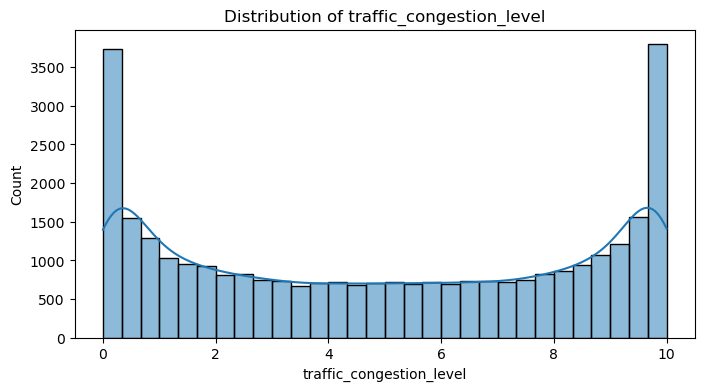

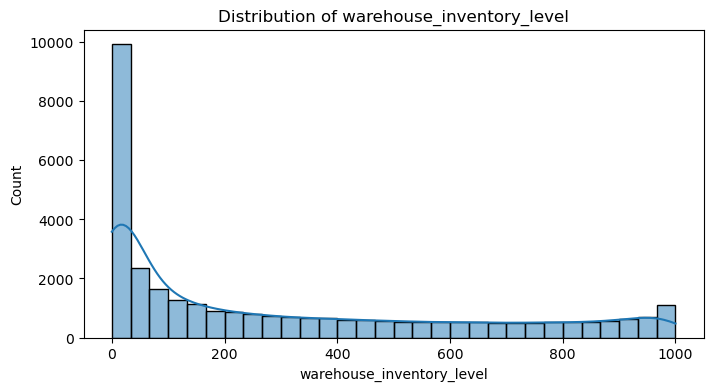

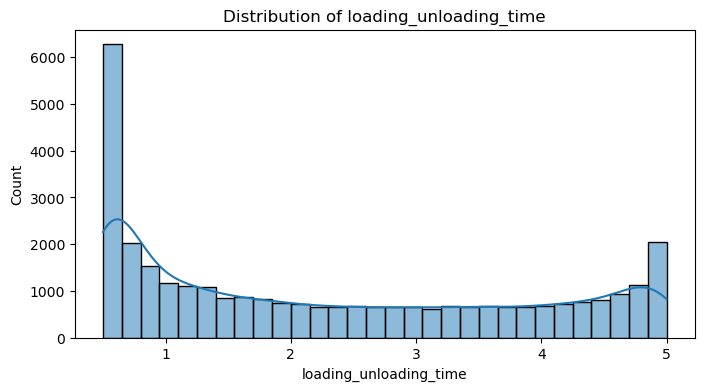

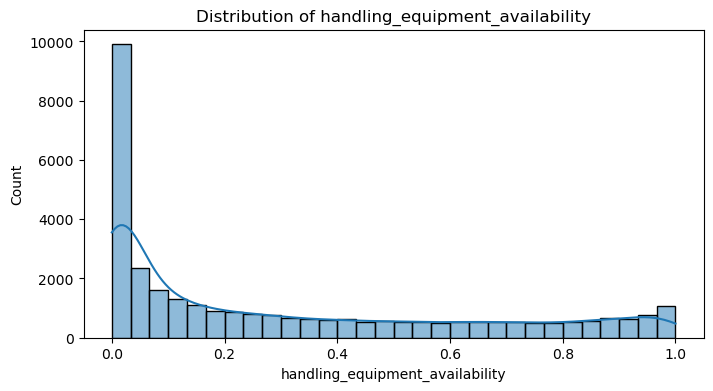

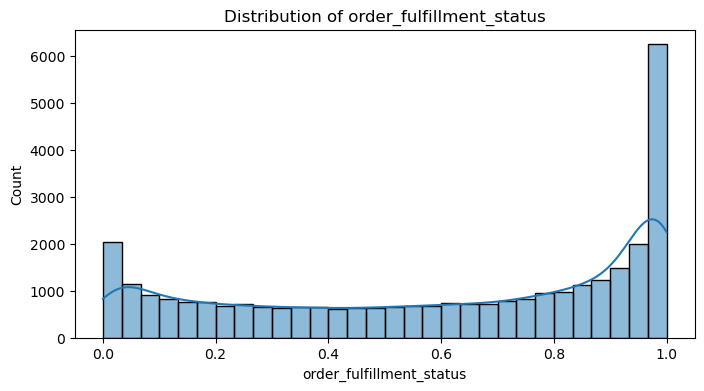

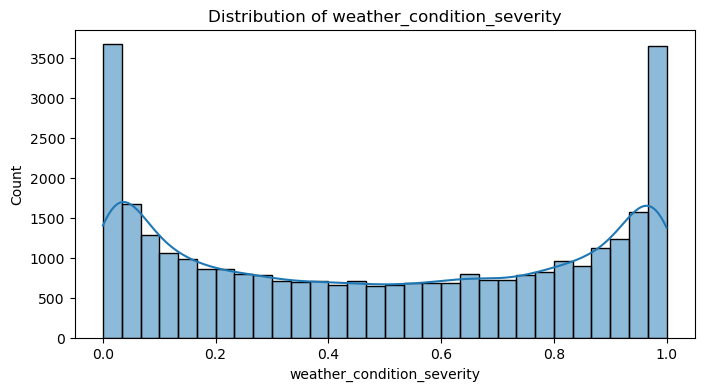

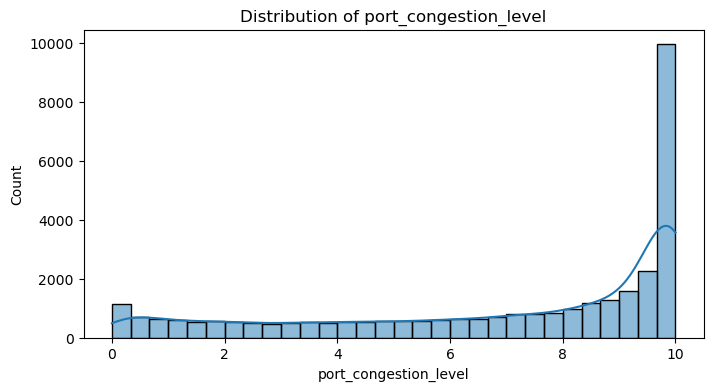

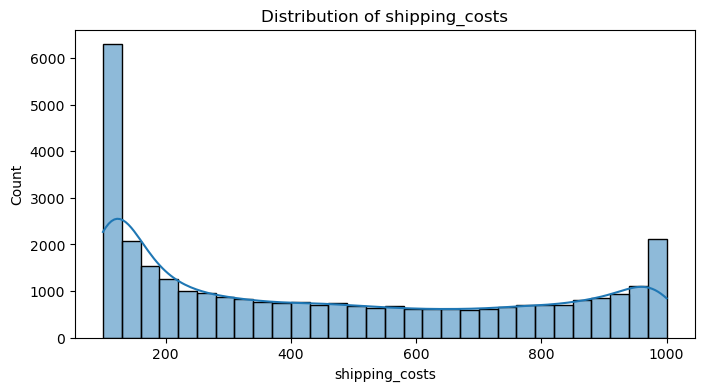

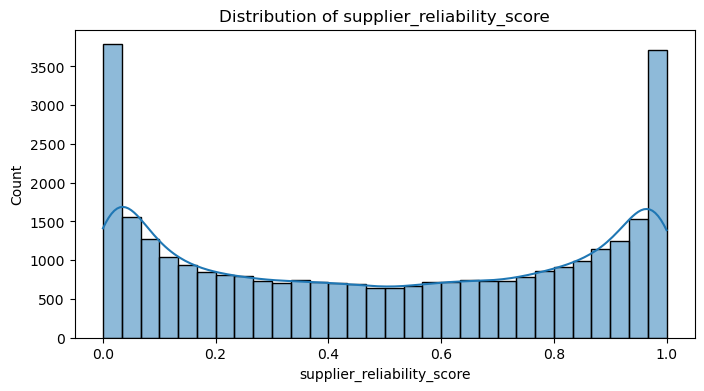

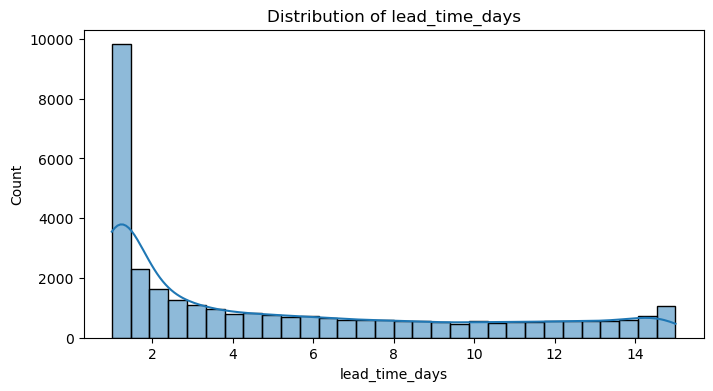

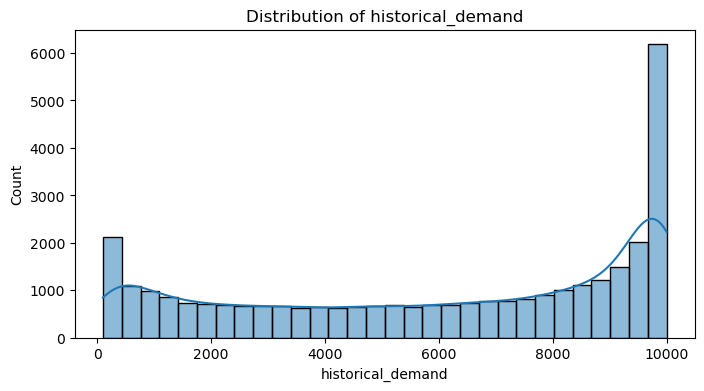

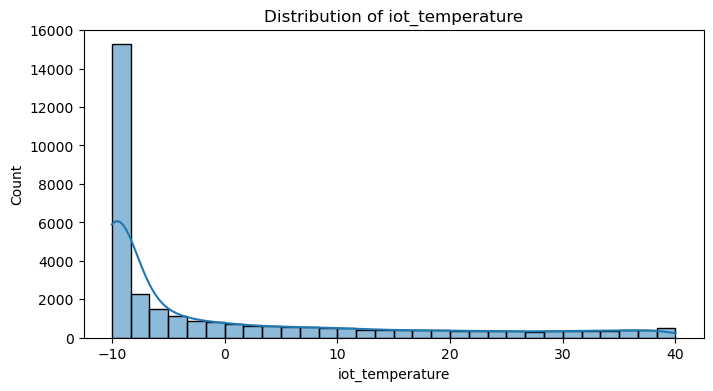

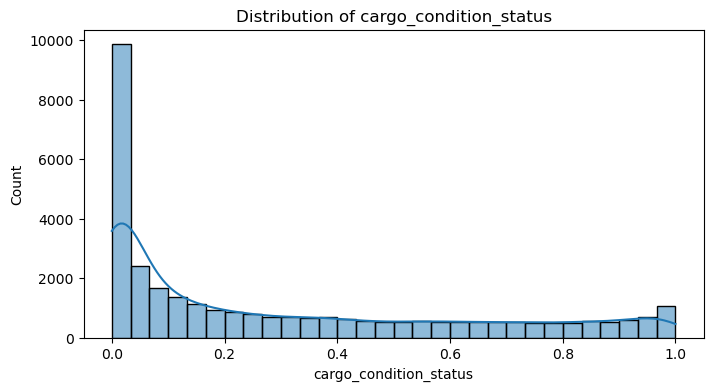

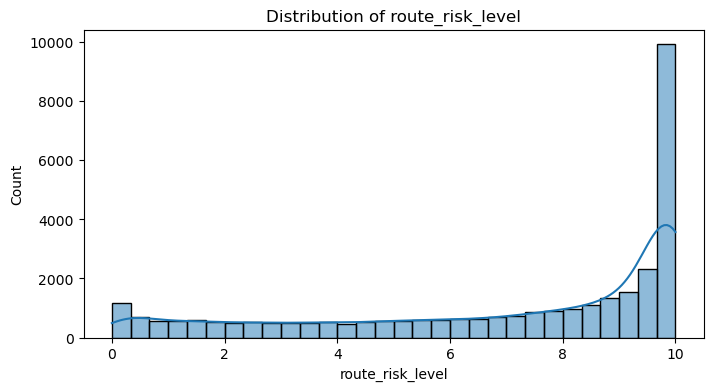

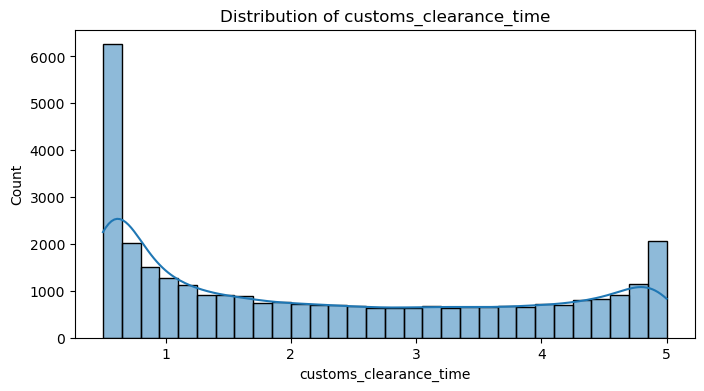

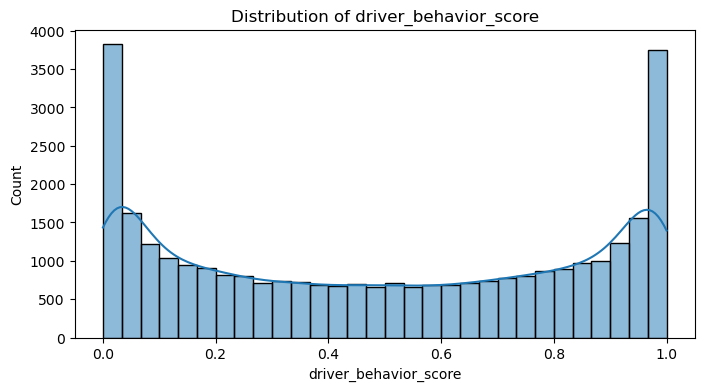

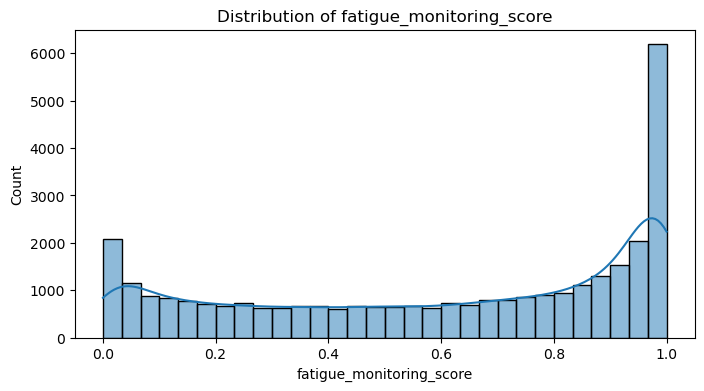

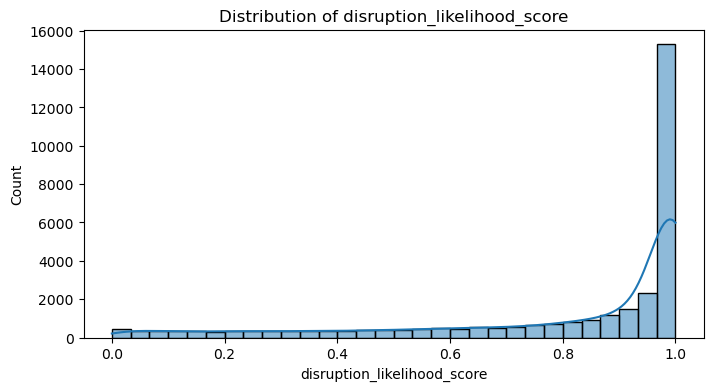

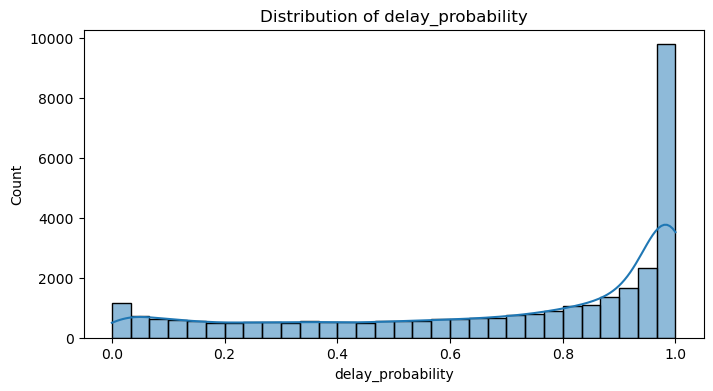

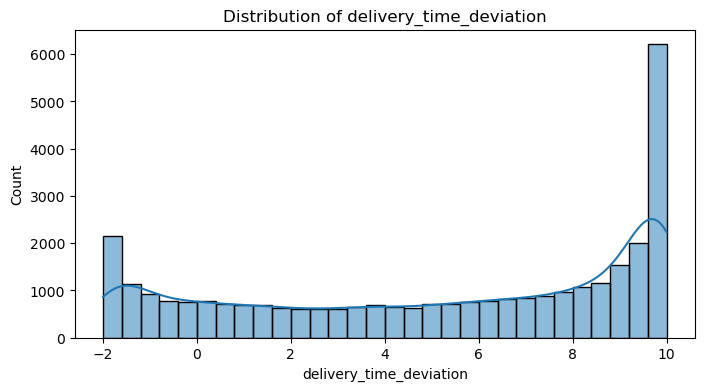

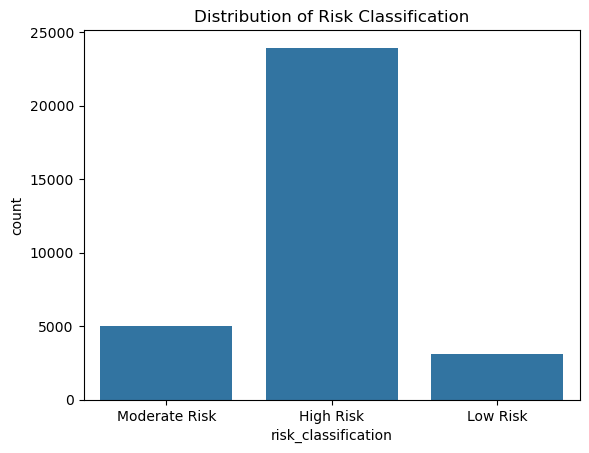

In [5]:
# Histograms of numerical features
for col in df.select_dtypes('float64').columns:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[col], bins=30, kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()

# Categorical variable
sns.countplot(x='risk_classification', data=df)
plt.title('Distribution of Risk Classification')
plt.show()

## Step 3: Time Series Trends

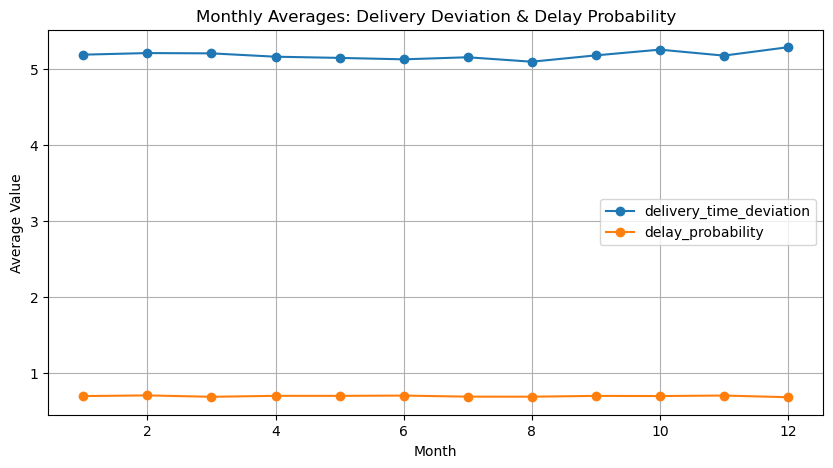

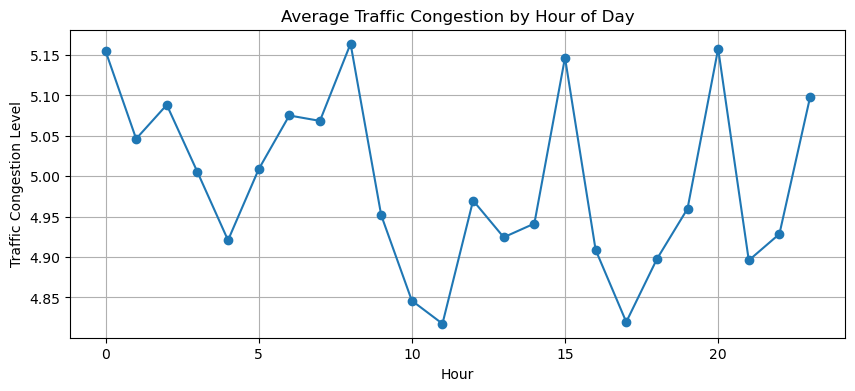

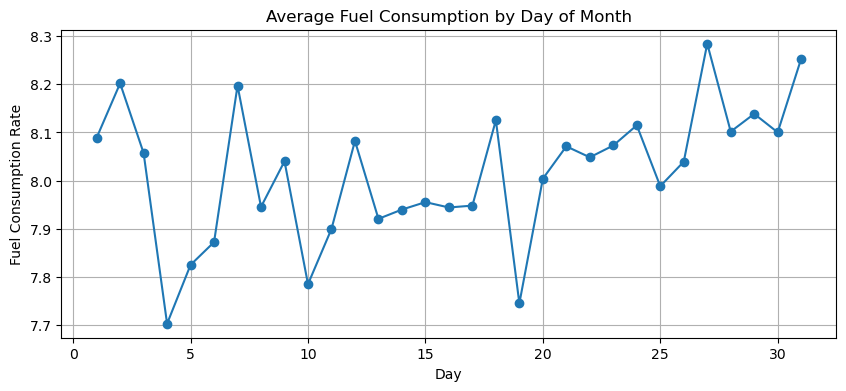

In [9]:
# Step 5: Time Series Exploration

# Create time-based features
df['hour'] = df['timestamp'].dt.hour
df['day'] = df['timestamp'].dt.day
df['month'] = df['timestamp'].dt.month
df['day_of_week'] = df['timestamp'].dt.dayofweek

# Time series trends: average delivery deviation and delay probability by month
monthly_trends = df.groupby('month')[['delivery_time_deviation', 'delay_probability']].mean()

# Plot monthly trends
monthly_trends.plot(marker='o', figsize=(10, 5))
plt.title('Monthly Averages: Delivery Deviation & Delay Probability')
plt.xlabel('Month')
plt.ylabel('Average Value')
plt.grid(True)
plt.show()

# Hourly trend: Average traffic congestion
hourly_congestion = df.groupby('hour')['traffic_congestion_level'].mean()

# Plot hourly congestion trend
plt.figure(figsize=(10, 4))
hourly_congestion.plot(marker='o')
plt.title('Average Traffic Congestion by Hour of Day')
plt.xlabel('Hour')
plt.ylabel('Traffic Congestion Level')
plt.grid(True)
plt.show()

# Daily variation: Average fuel consumption
daily_fuel = df.groupby('day')['fuel_consumption_rate'].mean()

plt.figure(figsize=(10, 4))
daily_fuel.plot(marker='o')
plt.title('Average Fuel Consumption by Day of Month')
plt.xlabel('Day')
plt.ylabel('Fuel Consumption Rate')
plt.grid(True)
plt.show()


### 📆 Monthly Trends

- **Delivery Time Deviation** and **Delay Probability** tend to rise mid-year (peaking around summer months).
- Possible **seasonality effects** (weather, demand surges, or vacation periods) may be influencing logistics delays.
---
### ⏰ Hourly Trends

- **Traffic Congestion Level** is higher during typical rush hours (**8–10 AM** and **4–6 PM**).
- Suggests congestion follows expected urban patterns and could inform **time-window planning**.
---
### 📅 Daily Trends

- **Fuel Consumption Rate** shows mild fluctuation day-to-day.
- Could reflect varying **routes, cargo weights, or operational conditions**.


## Step 4: Target Variable Analysis

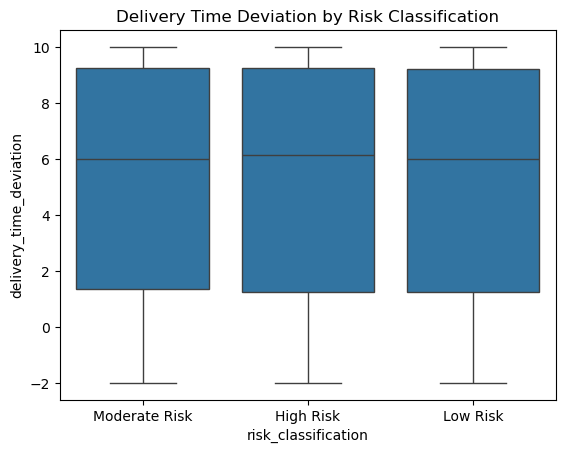

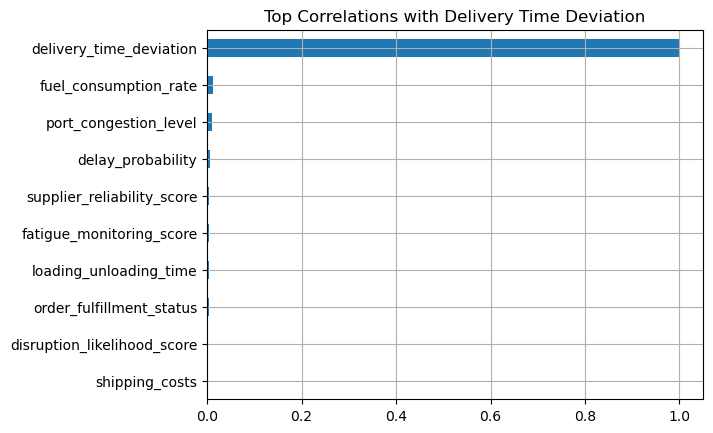

In [31]:
# Boxplot by risk class for delivery_time_deviation
sns.boxplot(x='risk_classification', y='delivery_time_deviation', data=df)
plt.title('Delivery Time Deviation by Risk Classification')
plt.show()

# Correlations with delivery_time_deviation
corrs = df.corr(numeric_only=True)['delivery_time_deviation'].sort_values(ascending=False)
corrs.head(10).plot(kind='barh')
plt.title('Top Correlations with Delivery Time Deviation')
plt.gca().invert_yaxis()
plt.grid(True)
plt.show()

## 📌 Conclusion
- No missing data or duplicates found.
- Several strong correlations and temporal/spatial patterns.
- `risk_classification` and `delivery_time_deviation` show meaningful relationships with operational variables.
- This EDA sets a strong foundation for modeling or optimization work.
